In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_input = pd.read_csv('Input/Medical_Insurance.csv')
df_input.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


## Data Overviewe

Data shape Data Type Missing value Duplicate value and Data descriptive

In [4]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [8]:
null_value_col = df_input.isnull().sum()

print("Columns with null values:\n", null_value_col[null_value_col > 0])

Columns with null values:
 alcohol_freq    30083
dtype: int64


In [9]:
df_input.duplicated().sum()

np.int64(0)

In [10]:
display(df_input.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_id,100000.0,NaN,NaN,NaN,50000.5,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
age,100000.0,NaN,NaN,NaN,47.5215,15.988752,0.0,37.0,48.0,58.0,100.0
sex,100000,3,Female,49193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,100000,5,South,28029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urban_rural,100000,3,Urban,60019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,100000.0,NaN,NaN,NaN,49873.905,46800.214127,1100.0,21100.0,36200.0,62200.0,1061800.0
education,100000,6,Bachelors,27996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,100000,4,Married,53252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_status,100000,4,Employed,55269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,100000.0,NaN,NaN,NaN,2.4309,1.075126,1.0,2.0,2.0,3.0,9.0


## Exploratory Data Analysis (EDA)

Inspect distributions for key numeric columns

Categorical counts

Correlations vs annual_medical_cost

Selected bivariate analyses

In [11]:
df_input.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   income                       100000 non-null  float64
 3   household_size               100000 non-null  int64  
 4   dependents                   100000 non-null  int64  
 5   bmi                          100000 non-null  float64
 6   visits_last_year             100000 non-null  int64  
 7   hospitalizations_last_3yrs   100000 non-null  int64  
 8   days_hospitalized_last_3yrs  100000 non-null  int64  
 9   medication_count             100000 non-null  int64  
 10  systolic_bp                  100000 non-null  float64
 11  diastolic_bp                 100000 non-null  float64
 12  ldl                          100000 non-null  float64
 13  

In [12]:
numeric_columns=['age', 'bmi', 'income', 'annual_premium', 'monthly_premium','claims_count','avg_claim_amount','total_claims_paid']

df_input[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,47.521500,15.988752,0.00,37.00,48.000,58.0000,100.00
bmi,100000.0,26.990512,4.994883,12.00,23.60,27.000,30.4000,50.40
income,100000.0,49873.905000,46800.214127,1100.00,21100.00,36200.000,62200.0000,1061800.00
annual_premium,100000.0,582.320040,399.583722,211.67,352.07,463.585,666.6975,10962.55
monthly_premium,100000.0,48.526668,33.298640,17.64,29.34,38.630,55.5600,913.55
claims_count,100000.0,1.621780,2.029820,0.00,0.00,1.000,2.0000,23.00
avg_claim_amount,100000.0,656.512084,1072.660048,0.00,0.00,318.015,872.2150,30010.53
total_claims_paid,100000.0,1377.878827,2305.464687,0.00,0.00,642.545,1795.5225,72517.95


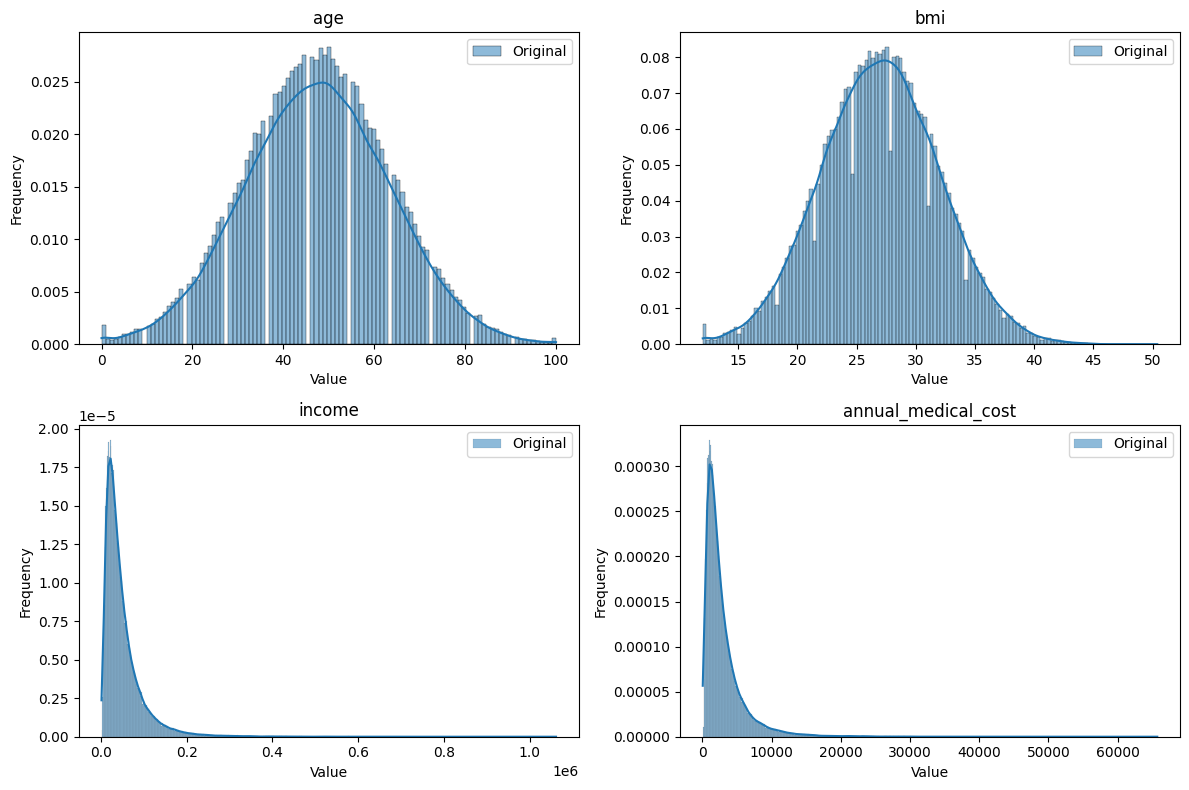

In [16]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(['age','bmi','income','annual_medical_cost']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_input[col], kde=True, label='Original', stat='density')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

## Correlation Heatmap

In this study, we do correlation heatmap with annual_medical_cost

In [17]:
corr_columns = df_input.select_dtypes(include=np.number).columns.to_list()

print("Numerical columns:", corr_columns)

Numerical columns: ['person_id', 'age', 'income', 'household_size', 'dependents', 'bmi', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']


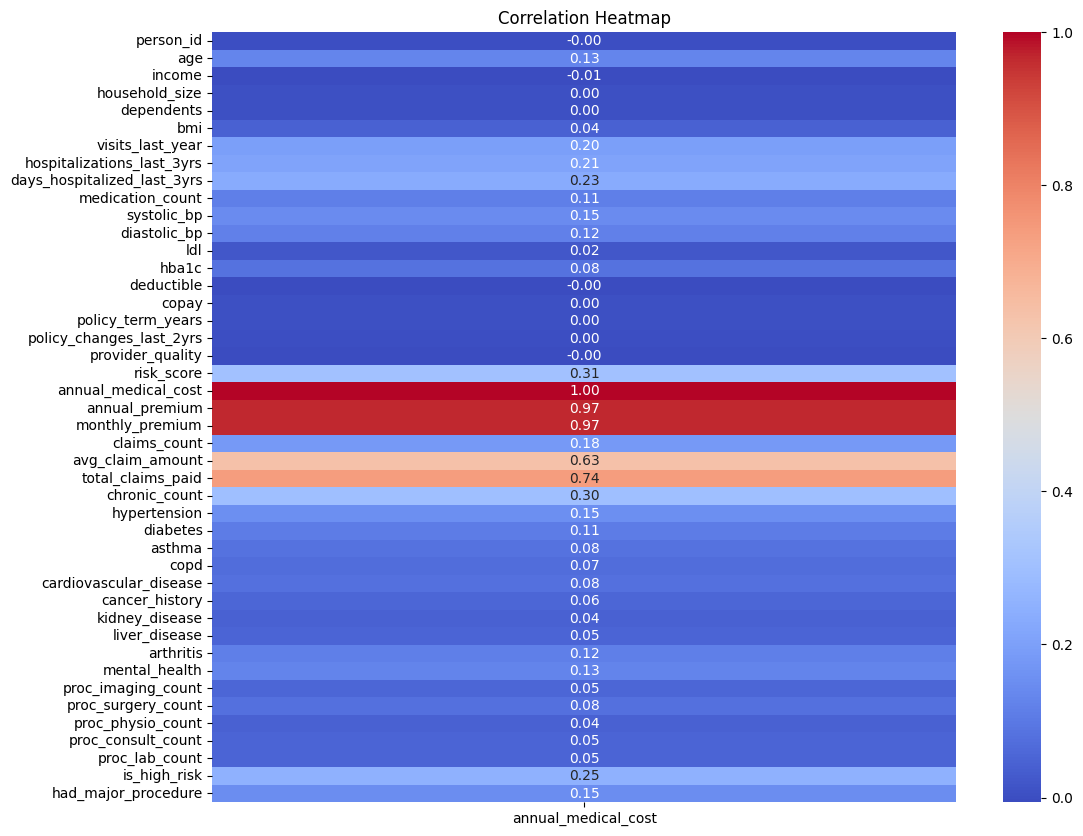

In [21]:
corr = df_input[corr_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr.loc[['annual_medical_cost']].T, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()